In [1]:
import numpy as np 
import pandas as pd 
import sys, os

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
sys.path.append('../src')
from interaction import Interaction

In [27]:
# slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+CD8/KIR+CD8_filtered85/KIR+CD8_filtered85_noint_output/0.1_1_out'
slide_outs = '/ix/djishnu/Jane/SLIDESWING/jing_data/KIR+TEDDY/KIR+TEDDY_filtered85/KIR+TEDDY_filtered85_noint_output/0.01_0.5_out'
machop = Interaction(slide_outs, plm_dim=16)

In [9]:
beta_interaction = machop.compute(fdr=0.30)
beta_interaction.shape

/ix/djishnu/alw399/envs/otter/lib/python3.10/site-packages/knockpy/mrc.py:276: UserWarning: 
	---------------------------------------------------------
	---------------------------------------------------------
	The choldate package is not installed:
	solving for MVR or maxent knockoffs without it will be 
	~5x slower. For instructions on how to install choldate,
	see https://amspector100.github.io/knockpy/installation.html.
	To disable this warning, set choldate_warning=False as an 
	argument or a knockoff_kwarg.
	----------------------------------------------------------
	----------------------------------------------------------

  warnings.warn(constants.CHOLDATE_WARNING)


(5, 16)

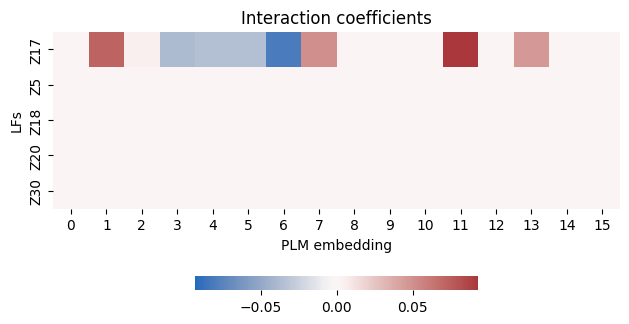

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt

beta_interaction = machop.sig_interaction
max = np.max(np.abs(beta_interaction))

fig, ax = plt.subplots()
df = pd.DataFrame(beta_interaction, index=machop.sig_LFs, columns=range(machop.l))
sns.heatmap(data=df, square=True, ax=ax, vmin=-max, vmax=max, 
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

plt.tight_layout()


In [ ]:
from deletion import EmbeddingEvaluator

evaluator = EmbeddingEvaluator()
accuracies = evaluator.get_contributions(
    embedding=machop.plm_embedding, 
    y=machop.y
)

In [38]:
accuracies 

[0.8670395446963006,
 0.8658620351290355,
 0.868315180060838,
 0.8632126386026886,
 0.8639976449808655,
 0.8650770287508586,
 0.8640957707781376,
 0.8647826513590423,
 0.8674320478853891,
 0.8663526641153959,
 0.8667451673044844,
 0.8633107643999608,
 0.8614463742517908,
 0.8670395446963006,
 0.865469531939947,
 0.8619370032381513,
 0.8648807771563144]

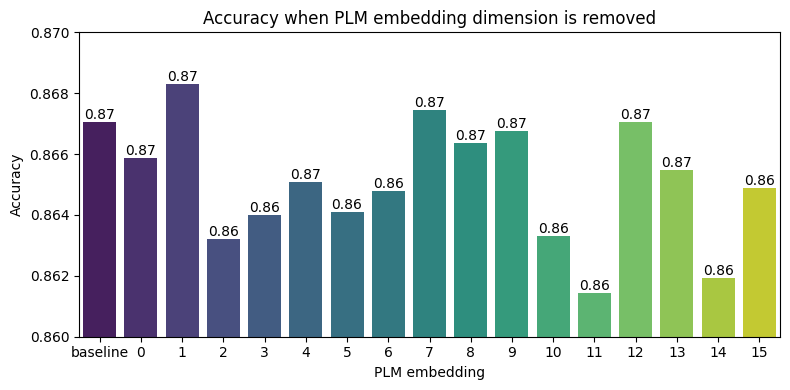

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

labels = ['baseline'] + list(range(machop.l))
sns.barplot(y=accuracies, x=labels, ax=ax, hue=labels, palette='viridis', legend=False)
ax.set_ylabel('Accuracy')
ax.set_xlabel('PLM embedding')

bars = ax.patches

for bar, accuracy in zip(bars,  accuracies):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{accuracy:.2f}',
        ha='center',
        va='bottom'
    )
ax.set_title('Accuracy when PLM embedding dimension is removed')
ax.set_ylim(0.86, 0.87)

plt.tight_layout()
plt.show()

In [ ]:
a

In [ ]:
# first col is standalone
max = np.max(np.abs(machop.beta_all))

fig, ax = plt.subplots()
sns.heatmap(machop.beta_all, square=True, ax=ax, vmin=-max, vmax=max, 
             
            cmap='vlag', cbar_kws={'orientation': 'horizontal', 'shrink': 0.5})
_ = ax.set(ylabel='LFs', xlabel='PLM embedding', title='Interaction coefficients')

In [ ]:
correlation_matrix = np.corrcoef(machop.z_matrix.T, machop.plm_embedding.T)
sns.heatmap(correlation_matrix)